<a href="https://colab.research.google.com/github/KavindaRajapaksha/DeepLearning/blob/main/RegressionModelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavindasrajapaksha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 5.65MB/s]

In [ ]:
data=pd.read_csv("random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
X=data['x']
Y=data['y']

In [ ]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


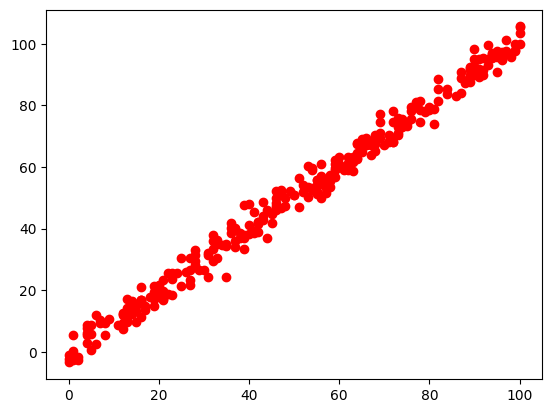

In [ ]:
plt.scatter(X,Y,c='r')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((240,), (60,))

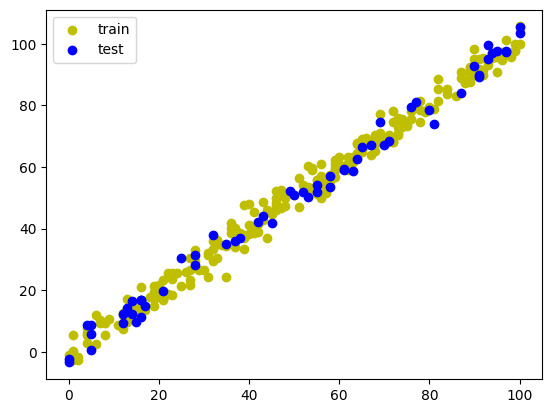

In [ ]:
plt.scatter(X_train,Y_train,c='y',label='train')
plt.scatter(X_test,Y_test,c='b',label='test')
plt.legend()
plt.show()

Model building

In [ ]:
#create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=['mae'])
#train model
epoch_num=20
model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=epoch_num)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 39.7207 - mae: 39.7207
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0412 - mae: 12.0412 
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3877 - mae: 7.3877 
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6594 - mae: 5.6594 
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2265 - mae: 4.2265 
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5245 - mae: 4.5245 
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6195 - mae: 3.6195 
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9451 - mae: 3.9451 
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1671 - mae: 3.1671 
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6809 - mae: 2.6809 
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4322 - mae: 2.4322 
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4279 - mae: 3.4279 
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7967 - mae

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [ ]:
y_predictions=model.predict(X_test)
y_predictions[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[93.2657  ],
       [78.71081 ],
       [97.42425 ],
       [ 4.896764],
       [94.30534 ]], dtype=float32)

In [ ]:
Y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


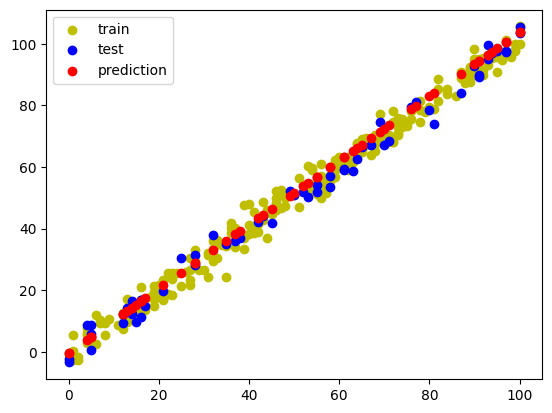

In [ ]:
plt.scatter(X_train,Y_train,c='y',label='train')
plt.scatter(X_test,Y_test,c='b',label='test')
plt.scatter(X_test,y_predictions,c='r',label='prediction')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.8166 - mae: 2.8166 


[2.8858413696289062, 2.8858413696289062]

In [ ]:
y_predictions.shape

(60, 1)

In [ ]:
tf.squeeze(y_predictions).shape

TensorShape([60])

In [ ]:
Y_test.shape

(60,)

In [ ]:
history=model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=epoch_num,verbose=0)

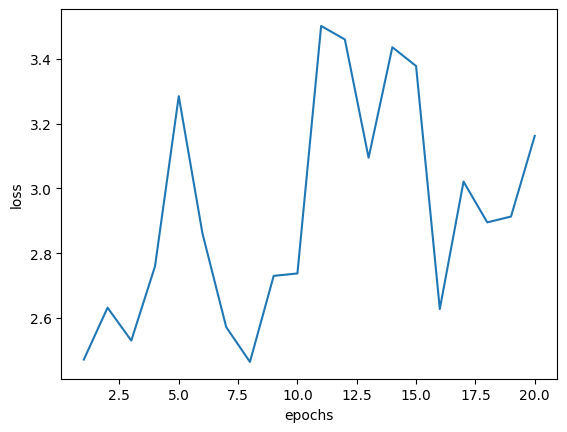

In [ ]:
x_range=range(1,epoch_num+1)
loss=history.history['loss']
plt.plot(x_range,loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()